<a href="https://colab.research.google.com/github/8johan/devoir/blob/main/rna_spli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

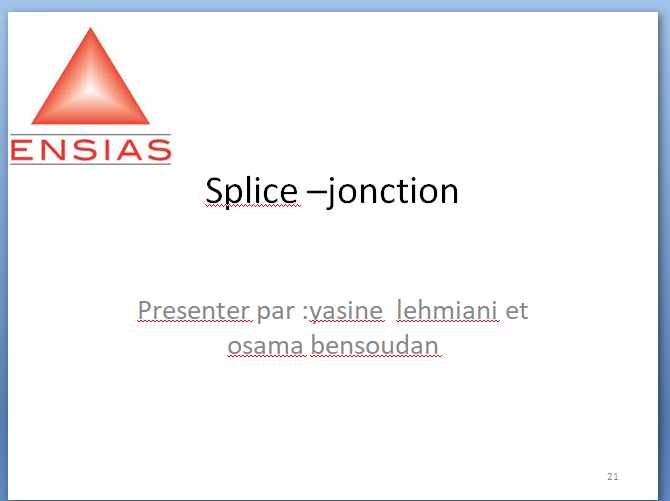

# ***INTRODUCTION ***

À un niveau élevé, le processus biologique de transcription est responsable de la génération de protéines fonctionnelles en décodant l'ADN. Une étape particulière de la transcription consiste à convertir un pré-ARNm
brin à un brin d'ARNm (ARN messager). Cette conversion se manifeste comme une procédure
appelé «épissage»: une édition du pré-ARNm qui entraîne la suppression de certaines sous-séquences
appelés introns. Les sous-séquences qui restent, appelées exons, sont réunies pour former l'ARNm,
qui finit par coder pour la génération d'une protéine spécifique.
En raison de son impact direct sur la génération de protéines, l'épissage est un processus largement étudié. La façon dont le prémARN est épissé explique l'expression des gènes et la diversité des protéines, qui à leur tour peuvent avoir un impact sur plusieurs
autres processus biologiques. Plus précisément, trouver exactement où sur l'épissage du brin pré-ARNm
se produit, et lorsqu'il ne se produit pas, peut fournir de nombreuses informations sur le processus de transcription. le
les endroits où les introns sont épissés sont appelés « jonctions d'épissage ». Les introns sont épissés avec précision
car ils sont flanqués de deux jonctions d'épissure à chaque extrémité. De plus, il existe deux types de
jonctions d'épissage - jonctions exon-intron (EI) et jonctions intron-exon (IE), et elles sont
chimiquement très différent. Au niveau le plus bas, l'épissage est catalysé par des molécules complexes appelées
splicéosomes. Ainsi, le problème de déterminer si une sous-section du brin de pré-ARNm peut se former
une jonction ou non équivaut à un certain niveau à déterminer les propriétés des molécules de spliceosome. 


En majorité, les sites d'épissage donneur et accepteur sont conservés avec les dimères GT et AG respectivement au début et à la fin des introns . La prédiction des sites d'épissage est vitale pour l'annotation du génome car la précision des programmes de recherche de gènes dépend de l'identification correcte des vrais sites d'épissage . Cependant, le GT/AG conservé n'est pas suffisant pour localiser le véritable signal d'épissage, en raison de la présence d'un grand nombre de di-nucléotides GT/AG (cas de faux positifs) dans les gènes ].

# *METHODES*

Plusieurs méthodes de calcul ont été proposées pour la prédiction des sites d'épissage, et celles-ci peuvent être globalement classées en deux classes, à savoir l'approche probabiliste et l'approche basée sur l'apprentissage automatique [6]. En ce qui concerne la précision des prédictions, les approches d'apprentissage automatique sont plus efficaces que les approches probabilistes [1]. Dans les approches basées sur l'apprentissage automatique, les séquences de sites d'épissage sont d'abord transformées en vecteurs numériques avant d'être utilisées comme entrée dans les classificateurs

La génération de Feature et la sélection de Feature informatives jouent un rôle central en ce qui concerne les performances de classification de l'approche d'apprentissage automatique.

Lors du traitement de la séquence d'ADN, il est nécessaire de convertir la séquence de chaînes en une valeur numérique, de manière à former une formation de modèle d'entrée matricielle. De manière générale, il existe trois méthodes d'encodage de séquence : l'encodage séquentiel, l'encodage à chaud et l'encodage k-mer (Choong et Lee, 2017). Les caractéristiques des trois méthodes de codage de l'ADN sont présentées dans le tableau 1.

tableau 1.

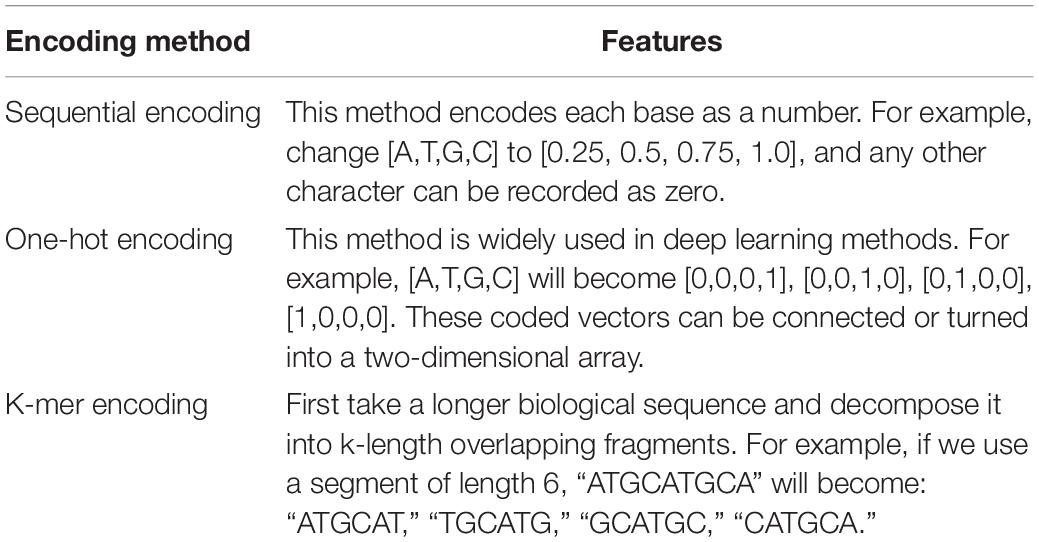

nous avons utulisé pour le clustring le Kmean et pour la classification :svm ,arbre des dession ,random forest et logistic regression 

pour evaluer les modele nous avons utuliser
*1- Accuracy = TP+TN/TP+FP+FN+TN*
*2- Precision = TP/TP+FP*
Precision – Precision is the ratio of correctly predicted positive observations to
the total predicted positive observations.
3-* Recall = TP/TP+FN*
Recall (Sensitivity) – Recall is the ratio of correctly predicted positive observations
to all observations in actual class – yes.
4- *F1 Score* = 2*(Recall * Precision) / (Recall + Precision)
F1 score – F1 Score is the weighted average of Precision and Recall.

pour notre data 'splice.data'
alors il contient 3190 sequence avec 3 class EI et IE et N 

Paires de bases composées de quatre types de bases azotées:Adénine (A), Thymine (T), Guanine (G) et Cytosine. Nous les appelons toujours A, C, G, T.

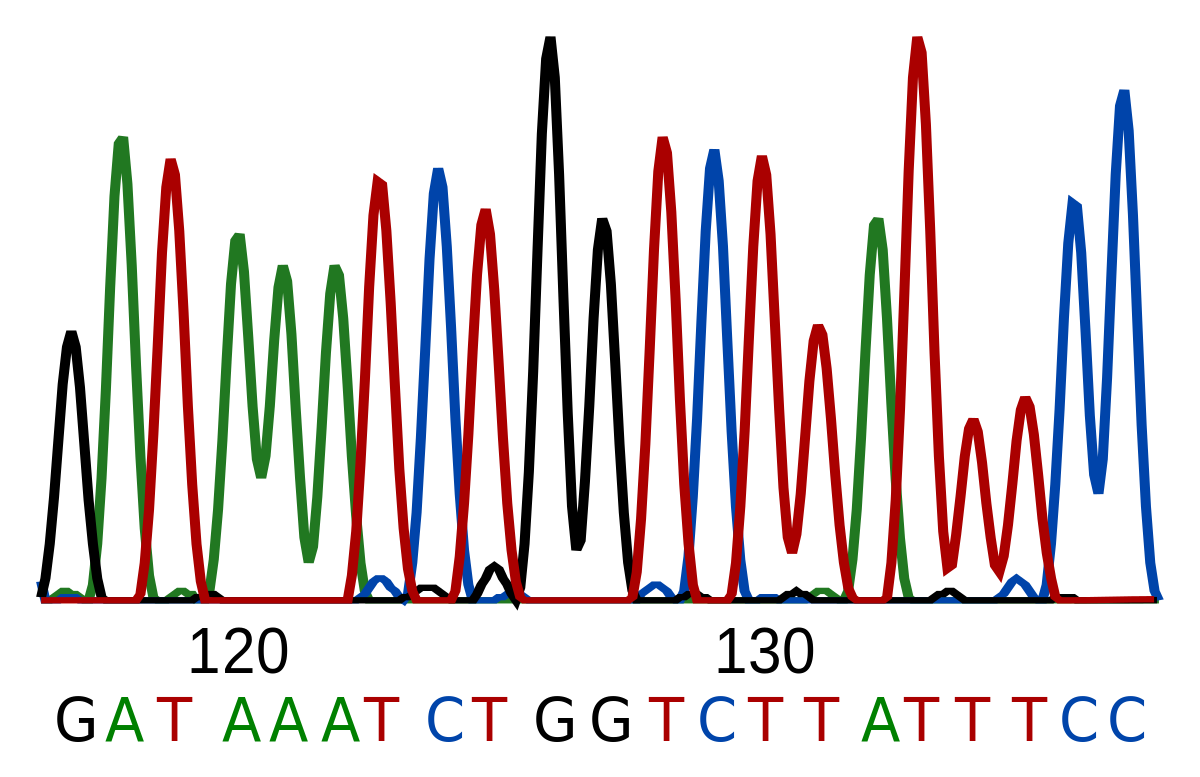

aussi il existe N : A OU T OU G OU C D:A ,G, T    S :C , G   R		     A , G

# **workflow **

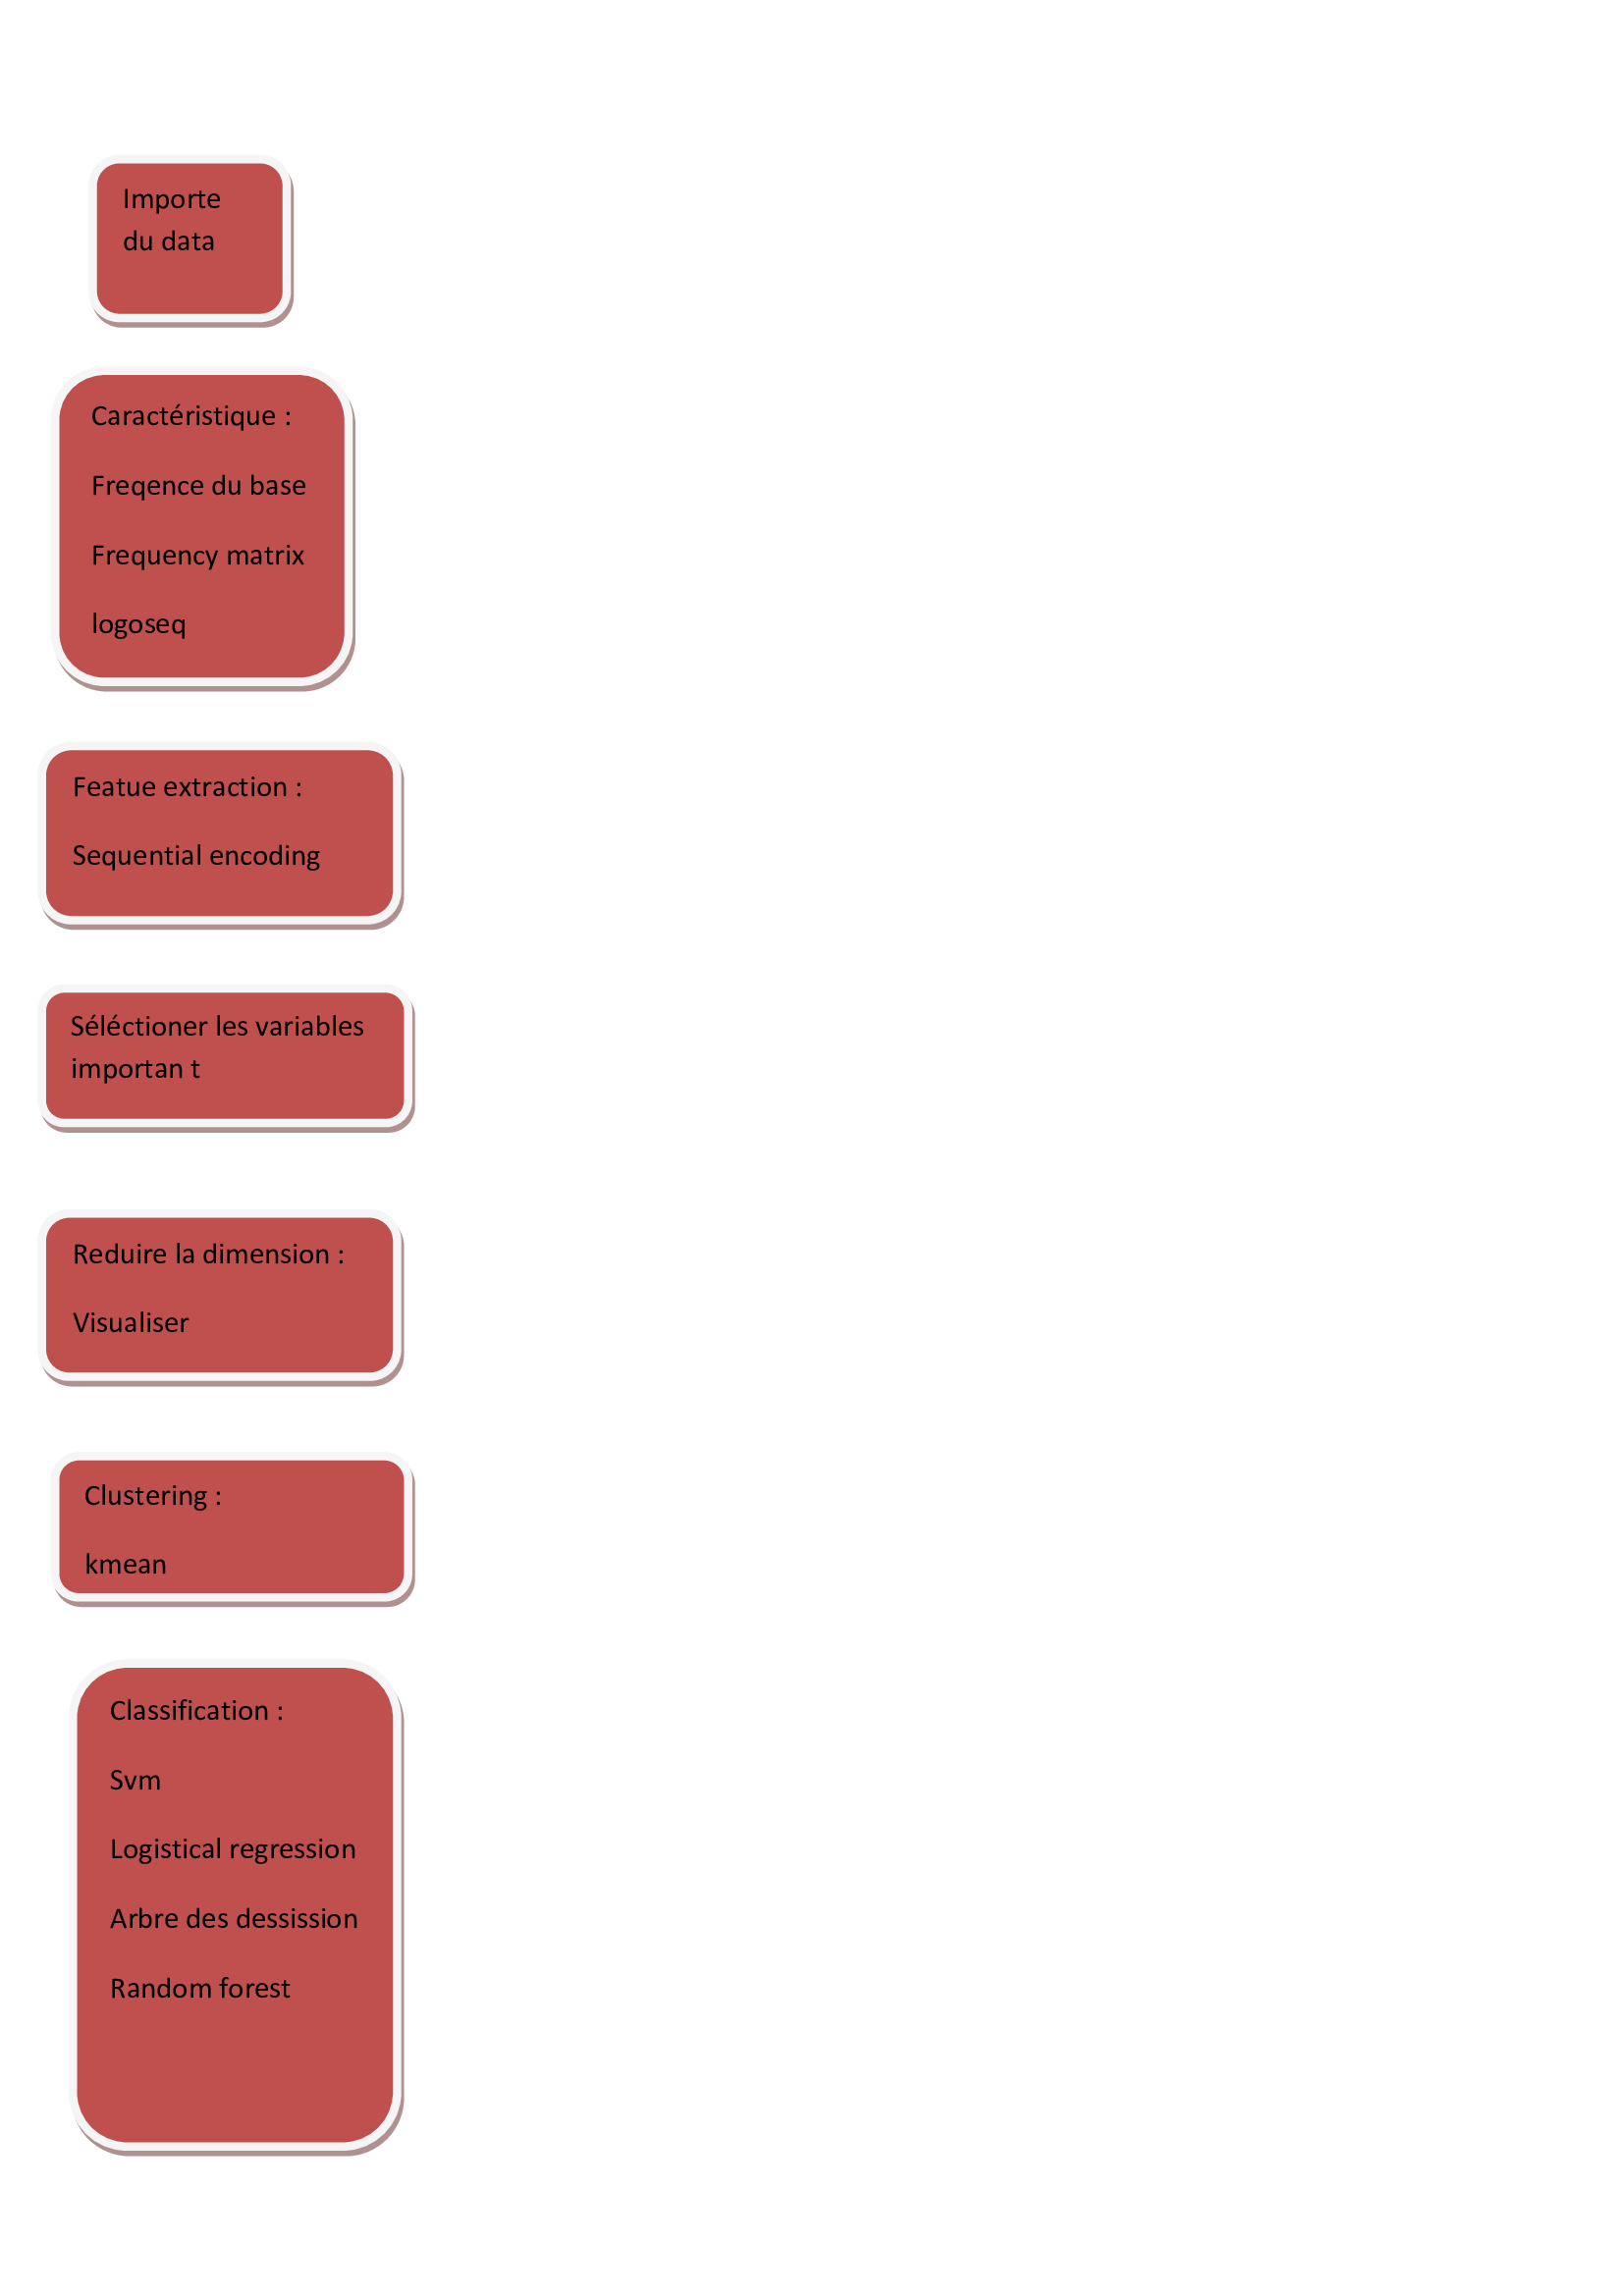

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sys 


IMPORT DU DATA

In [ ]:
fname = '/content/splice (1).data'
with open(fname) as f:
    content = f.readlines()
content = [x.strip().split(',') for x in content]
for l in content:
    for i in range(len(l)):
        l[i] = l[i].strip()
raw_data = np.array(content)

In [ ]:
raw_data

array([['EI', 'ATRINS-DONOR-521',
        'CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG'],
       ['EI', 'ATRINS-DONOR-905',
        'AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC'],
       ['EI', 'BABAPOE-DONOR-30',
        'GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG'],
       ...,
       ['N', 'ORARGIT-NEG-241',
        'TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGGTCCCCGGCCGCGGCCCCGACGTGTGTGTC'],
       ['N', 'TARHBB-NEG-541',
        'ATTCTACTTAGTAAACATAATTTCTTGTGCTAGATAACCAAATTAAGAAAACCAAAACAA'],
       ['N', 'TARHBD-NEG-1981',
        'AGGCTGCCTATCAGAAGGTGGTGGCTGGTGTGGCTGCTGCTCTGGCTCACAAGTACCATT']],
      dtype='<U60')

***caractéristique***

In [ ]:
N=0
EI=0
IE=0
for i in range(3190):
  if raw_data[i][0]=='N':
    N=N+1
  if raw_data[i][0]=='IE':
    IE=IE+1
  if raw_data[i][0]=='EI':
    EI=EI+1

In [ ]:
print(N/3190)
print(EI/3190)
print(IE/3190)

0.5188087774294671
0.24043887147335424
0.24075235109717869


on remarque qu on a 25% du class EI et 25% pour la class IE et 50% pour N 

nous allons calculer les frequence des *base* dans touts les sequences 

In [ ]:
frq={'A':0,'T':0,'C':0,'G':0,'N':0,'R':0,'S':0,'D':0}

for i in range(3190):
  frq['A']=raw_data[i][2].count('A')+frq['A']
  frq['T']=raw_data[i][2].count('T')+frq['T']
  frq['C']=raw_data[i][2].count('C')+frq['C']
  frq['G']=raw_data[i][2].count('G')+frq['G']
  frq['N']=raw_data[i][2].count('N')+frq['N']
  frq['R']=raw_data[i][2].count('R')+frq['R']
  frq['S']=raw_data[i][2].count('S')+frq['S']
  frq['D']=raw_data[i][2].count('D')+frq['D']
print(frq)

{'A': 44487, 'T': 46308, 'C': 50300, 'G': 50245, 'N': 56, 'R': 1, 'S': 1, 'D': 2}


In [ ]:
frq={'A':0,'T':0,'C':0,'G':0,'N':0,'R':0,'S':0,'D':0}
n=3190*60
for i in range(3190):
  frq['A']=(raw_data[i][2].count('A')+frq['A'])/n
  frq['T']=(raw_data[i][2].count('T')+frq['T'])/n
  frq['C']=(raw_data[i][2].count('C')+frq['C'])/n
  frq['G']=(raw_data[i][2].count('G')+frq['G'])/n
  frq['N']=(raw_data[i][2].count('N')+frq['N'])/n
  frq['R']=(raw_data[i][2].count('R')+frq['R'])/n
  frq['S']=(raw_data[i][2].count('S')+frq['S'])/n
  frq['D']=(raw_data[i][2].count('D')+frq['D'])/n
print(frq)

{'A': 5.2247368289162564e-05, 'T': 8.359503040448187e-05, 'C': 7.314551853293892e-05, 'G': 0.00010449334443100107, 'N': 0.0, 'R': 0.0, 'S': 0.0, 'D': 0.0}


on peux remarquer que les Bases '*N'* ,*'S'* ,*'R'*,et *'D'* ont des frequence trés faible

fréquency matrix 

frqmat constuir la matrice du fréquence
Nous nous référons à une matrice constituée de nombres de nucléotides par position comme une matrice de fréquence de position (PFM). Schneider et al. (1982, 1986) et Staden (1984) ont été parmi les premières études à utiliser les PFM pour caractériser la spécificité du site de liaison à l'ADN.

In [ ]:
def frqmat(x):
  la=[0]*60
  for i in range(60):
    for j in range(3190):
      if raw_data[j][2][i]== x :
        la[i]=1+la[i]

        
  return la





In [ ]:
l={'A','T','G','C'}
ll=[]
for i in ['A','T','G','C']:
  ll.append(frqmat(i))

In [ ]:
ll= pd.DataFrame(ll)
ll = ll.rename({0:"A",1:"T",2:'G' ,3:"C"}, axis='index')

lpi=ll.transpose()
lpi

,A,T,G,C
0,743,735,876,835
1,779,758,794,858
2,712,761,841,876
3,753,751,802,884
4,801,805,719,865
5,704,760,828,898
6,783,769,780,858
7,790,791,731,878
8,749,783,749,909
9,767,849,766,808


***logoseq***

Logomaker est un package Python permettant de générer des logos de séquence de qualité publication. Logomaker peut générer des logos standard et hautement personnalisés illustrant les propriétés des séquences d'ADN, d'ARN ou de protéines. Les logos sont rendus sous forme de graphiques vectoriels intégrés dans des objets Matplotlib Axes natifs, ce qui les rend faciles à styliser et à incorporer dans des figures à plusieurs panneaux. Les sections Installation, Démarrage rapide, Exemples et tutoriel ci-dessous sont fournies pour aider les utilisateurs à faire fonctionner rapidement Logomaker pour leurs propres besoins de recherche. Pour plus d'informations sur Logomaker, 

In [ ]:
pip install logomaker

     |████████████████████████████████| 11.8 MB 3.6 MB/s 


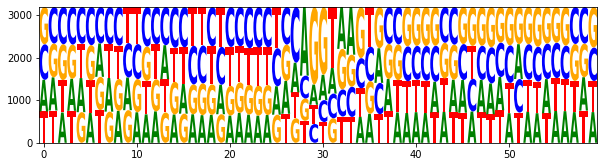

In [ ]:
import logomaker as lm
lm.Logo(lpi)


# *generation du datafram*

In [ ]:
 column_names=['type', 'Donor', 'seq ']
x = pd.DataFrame(raw_data,columns = column_names)
x.head()


,type,Donor,seq
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCC...
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCC...
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCG...
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTT...
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCC...


# Feature extraction with 'sequential encoding'

partie codage

string_to_array va séparer les sequence en dans charachteres en miniscule  

In [ ]:
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'z', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder



nous avons défini la fonction ordinal_encodor et nous avons utulise le codeur labelEncoder()

LabelEncoder():
Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X.

puisque les fréquence du 'D' et 'R' et 'S' et 'N' sont faible nous avons les encoder par  la valeur 0

In [ ]:
def ordinal_encoder(my_array):
   label_encoder = LabelEncoder()
   label_encoder.fit(np.array(['a','c','g','t','z']))
   integer_encoded = label_encoder.transform(my_array)
   float_encoded = integer_encoded.astype(float)
   float_encoded[float_encoded == 0] = 0.25 # A
   float_encoded[float_encoded == 1] = 0.25 # C
   float_encoded[float_encoded == 2] =0.75 # G
   float_encoded[float_encoded == 3] = 1 # T
   float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
   

   return float_encoded

In [ ]:
l=[]
for i in range(3190):
  o=raw_data[i][2]
  u=ordinal_encoder(string_to_array(raw_data[i][2]))
  l.append(u)

In [ ]:
u = pd.DataFrame(l)
r = pd.concat([x, u], axis=1)
r

,type,Donor,seq,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCC...,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,1.00,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.75,0.25,0.25,1.00,1.00,0.25,0.75,0.25,0.75,0.25,0.25,0.25,0.75,1.00,0.25,1.00,0.75
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCC...,0.25,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.75,1.00,0.75,0.25,0.25,0.25,0.25,0.25,0.75,0.25
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCG...,0.75,0.25,0.75,0.75,1.00,0.75,0.25,0.25,0.75,0.75,0.25,0.25,0.75,1.00,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.75,0.75,0.75,0.25,1.00,0.75
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTT...,0.75,0.75,0.75,0.25,1.00,0.75,0.25,0.75,1.00,1.00,0.75,0.25,1.00,0.75,0.75,1.00,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,1.00,1.00,0.75,0.25,1.00,0.25,0.75,0.75,1.00,1.00,1.00,1.00,0.25,0.25,0.25,0.25
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCC...,0.75,0.25,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,1.00,0.75,0.25,0.75,1.00,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,1.00,0.75,0.25,0.25,0.25,0.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,N,ORAHBPSBD-NEG-2881,TCTCTTCCCTTCCCCTCTCTCTTTCTTTCTTTTCTCTCCTCTTCTC...,1.00,0.25,1.00,0.25,1.00,1.00,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,1.00,0.25,1.00,0.25,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,1.00,0.25,1.00,0.25,1.00,0.25,0.25,1.00,0.25,1.00,1.00,0.25,1.00,0.25,1.00,1.00,0.25,1.00,1.00,1.00,0.25,0.25,1.00,0.25,1.00,0.25,1.00,1.00
3186,N,ORAINVOL-NEG-2161,GAGCTCCCAGAGCAGCAAGAGGGCCAGCTGAAGCACCTGGAGAAGC...,0.75,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,1.00,0.75
3187,N,ORARGIT-NEG-241,TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGGTCCCCGGCCGCGGCC...,1.00,0.25,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,0.75,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,1.00,0.75,1.00,0.75,1.00,0.75,1.00,0.25
3188,N,TARHBB-NEG-541,ATTCTACTTAGTAAACATAATTTCTTGTGCTAGATAACCAAATTAA...,0.25,1.00,1.00,0.25,1.00,0.25,0.25,1.00,1.00,0.25,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,1.00,1.00,1.00,0.25,1.00,1.00,0.75,1.00,0.75,0.25,1.00,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


# elimination des variables non important 

In [ ]:
r=r.drop('seq ',axis=1)
r=r.drop('Donor',axis=1)

In [ ]:
r

,type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,EI,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,1.00,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.75,0.25,0.25,1.00,1.00,0.25,0.75,0.25,0.75,0.25,0.25,0.25,0.75,1.00,0.25,1.00,0.75
1,EI,0.25,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.75,1.00,0.75,0.25,0.25,0.25,0.25,0.25,0.75,0.25
2,EI,0.75,0.25,0.75,0.75,1.00,0.75,0.25,0.25,0.75,0.75,0.25,0.25,0.75,1.00,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.75,0.75,0.75,0.25,1.00,0.75
3,EI,0.75,0.75,0.75,0.25,1.00,0.75,0.25,0.75,1.00,1.00,0.75,0.25,1.00,0.75,0.75,1.00,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,1.00,1.00,0.75,0.25,1.00,0.25,0.75,0.75,1.00,1.00,1.00,1.00,0.25,0.25,0.25,0.25
4,EI,0.75,0.25,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,1.00,0.75,0.25,0.75,1.00,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,1.00,0.75,0.25,0.25,0.25,0.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,N,1.00,0.25,1.00,0.25,1.00,1.00,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,1.00,0.25,1.00,0.25,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,1.00,0.25,1.00,0.25,1.00,0.25,0.25,1.00,0.25,1.00,1.00,0.25,1.00,0.25,1.00,1.00,0.25,1.00,1.00,1.00,0.25,0.25,1.00,0.25,1.00,0.25,1.00,1.00
3186,N,0.75,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,1.00,0.75
3187,N,1.00,0.25,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,0.75,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,1.00,0.75,1.00,0.75,1.00,0.75,1.00,0.25
3188,N,0.25,1.00,1.00,0.25,1.00,0.25,0.25,1.00,1.00,0.25,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,1.00,1.00,1.00,0.25,1.00,1.00,0.75,1.00,0.75,0.25,1.00,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


nous avons construir 60 variables tlq chaque variable represent la position dans la sequence

In [ ]:

o=r
o=o.drop('type',axis=1)

# **PCA**

puisque nous avont 60 variables et c'est imposible du visualiser notre data pour cela nous avons réduit sa dimension 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(o)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [ ]:
final=pd.concat([principalDf,r['type'] ], axis=1)

In [ ]:
final

,PC1,PC2,type
0,0.150605,-0.402258,EI
1,0.619655,-0.048202,EI
2,-0.179903,-0.554168,EI
3,-0.792645,-0.255718,EI
4,0.664254,-0.702449,EI
...,...,...,...
3185,-0.927884,-0.459022,N
3186,0.575029,0.366462,N
3187,-0.248102,-0.191660,N
3188,0.268569,0.531212,N


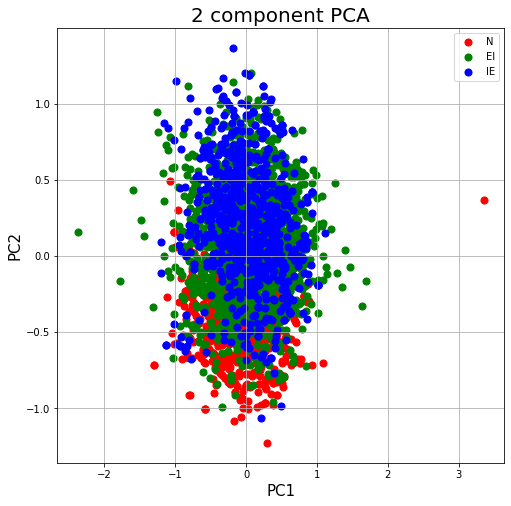

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['N', 'EI', 'IE']
colors = ['r', 'g', 'b']

indicesToKeep1 = final['type'] == 'EI'
indicesToKeep2 = final['type'] == 'N'
indicesToKeep3 = final['type'] == 'IE'

ax.scatter(final.loc[indicesToKeep1, 'PC1'], final.loc[indicesToKeep1, 'PC2'], c = 'r', s = 50)
ax.scatter(final.loc[indicesToKeep2, 'PC1'], final.loc[indicesToKeep2, 'PC2'], c = 'g', s = 50)
ax.scatter(final.loc[indicesToKeep3, 'PC1'], final.loc[indicesToKeep3, 'PC2'], c = 'b', s = 50)
ax.legend(targets)
ax.grid()

les donnés ne sont pas bien présenter car il ya 3190 individu 

on prend d'une maniére alératoire 319 

In [ ]:
vis=final.sample(frac=0.1,random_state=20) 
vis

,PC1,PC2,type
270,-0.114424,-0.041649,EI
398,-0.785695,-0.539671,EI
1854,0.358540,-0.021550,N
2616,-0.214092,0.032641,N
1922,-0.187184,0.716613,N
...,...,...,...
421,-0.293046,-0.801861,EI
2068,-0.281536,-0.142386,N
871,0.451326,0.439172,IE
238,0.465616,0.100520,EI


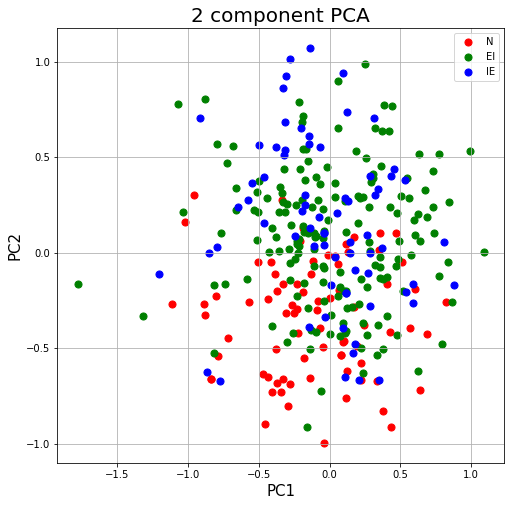

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['N', 'EI', 'IE']
colors = ['r', 'g', 'b']

indicesToKeep1 = vis['type'] == 'EI'
indicesToKeep2 = vis['type'] == 'N'
indicesToKeep3 = vis['type'] == 'IE'

ax.scatter(vis.loc[indicesToKeep1, 'PC1'], vis.loc[indicesToKeep1, 'PC2'], c = 'r', s = 50)
ax.scatter(vis.loc[indicesToKeep2, 'PC1'], vis.loc[indicesToKeep2, 'PC2'], c = 'g', s = 50)
ax.scatter(vis.loc[indicesToKeep3, 'PC1'], vis.loc[indicesToKeep3, 'PC2'], c = 'b', s = 50)
ax.legend(targets)
ax.grid()

codage du label 

nous avons coder N par 0 et EI par 1 et IE par 2

In [ ]:
final['type']=final['type'].map({'EI':1,'N':0,'IE':2},na_action=None)

In [ ]:
final

,PC1,PC2,type
0,0.150605,-0.402258,1
1,0.619655,-0.048202,1
2,-0.179903,-0.554168,1
3,-0.792645,-0.255718,1
4,0.664254,-0.702449,1
...,...,...,...
3185,-0.927884,-0.459022,0
3186,0.575029,0.366462,0
3187,-0.248102,-0.191660,0
3188,0.268569,0.531212,0


# train / test 

In [ ]:
y=np.c_[final["type"]]
x=np.c_[final['PC1'],final['PC2']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 1)

# **clustring avec Kmean **

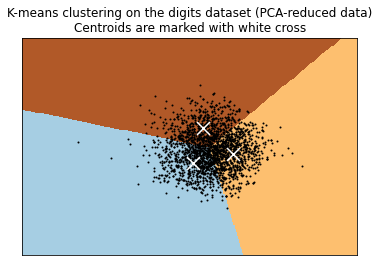

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4)
kmeans.fit(X_train)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(X_train[:, 0], X_train[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()





# ***clasiffication ***

## svm avec tout les kernel 

# train the model 

In [ ]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [ ]:
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.5, C=C).fit(X_train, y_train)
poly_svc = SVC(kernel='poly', degree=5, C=C).fit(X_train, y_train)
lin_svc = LinearSVC(C=C).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:

y_pred1 = svc.predict(X_test)
y_pred2 =rbf_svc.predict(X_test)
y_pred3=poly_svc.predict(X_test)


# evaluation du modéle 

# svc

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.57      0.84      0.68       486
           1       0.60      0.61      0.60       234
           2       0.00      0.00      0.00       237

    accuracy                           0.58       957
   macro avg       0.39      0.48      0.43       957
weighted avg       0.44      0.58      0.49       957



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RBF KERNEL

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.57      0.84      0.68       486
           1       0.60      0.60      0.60       234
           2       0.75      0.01      0.02       237

    accuracy                           0.58       957
   macro avg       0.64      0.49      0.44       957
weighted avg       0.62      0.58      0.50       957



POLY KERNEL

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.53      0.95      0.68       486
           1       0.68      0.23      0.34       234
           2       0.67      0.03      0.06       237

    accuracy                           0.55       957
   macro avg       0.63      0.41      0.36       957
weighted avg       0.60      0.55      0.45       957



# VISUALISATION DU DATA APRES CLASSIFICATION PAR SVM 

In [ ]:
h = .02 
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

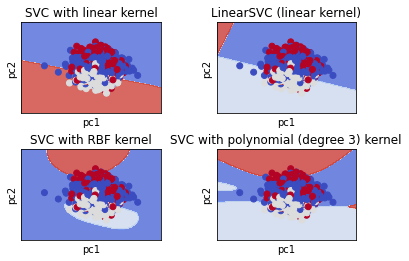

In [ ]:


# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

CLASIFICATION AVEC LOGISTIC REGRESION 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=10**7).fit(X_train, y_train)
w_star = clf.coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


evaluation 

In [ ]:
y_pred=clf.predict(X_test )
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.85      0.68       486
           1       0.61      0.59      0.60       234
           2       0.67      0.02      0.03       237

    accuracy                           0.58       957
   macro avg       0.61      0.48      0.44       957
weighted avg       0.60      0.58      0.50       957



# visualisation 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


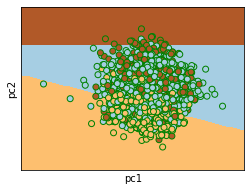

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets



# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="g", cmap=plt.cm.Paired)
plt.xlabel("pc1")
plt.ylabel("pc2")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# classification avec random foresst et dession tres

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.85      0.68       486
           1       0.61      0.59      0.60       234
           2       0.67      0.02      0.03       237

    accuracy                           0.58       957
   macro avg       0.61      0.48      0.44       957
weighted avg       0.60      0.58      0.50       957



# RandomForestClassifier

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.58      0.76      0.66       486
           1       0.56      0.68      0.61       234
           2       0.60      0.11      0.19       237

    accuracy                           0.58       957
   macro avg       0.58      0.52      0.49       957
weighted avg       0.58      0.58      0.53       957



# Decision surface of a decision tree

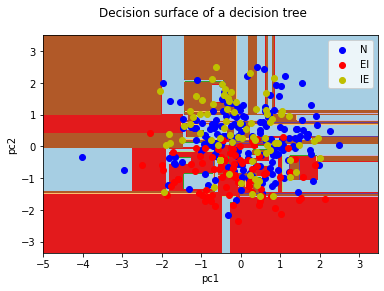

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02
vus=final.sample(frac=0.15,random_state=20) 
y=np.c_[vus["type"]]
x=np.c_[vus['PC1'],vus['PC2']]

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 1)



for pairidx, pair in enumerate([[0, 1]]):
    # We only take the two corresponding features
    X = X_train
    y = y_train 

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(1, 1, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.axis("tight")
    targetss=['N','EI','IE']

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=targetss[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree ")
plt.legend()
plt.show()

on peux remarquer que notre arbre esr fait une bon classification pour le class 'EI'

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(o)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5'])
arb=final=pd.concat([principalDf,r['type'] ], axis=1)
arb

,PC1,PC2,PC3,PC4,PC5,type
0,0.145587,-0.428026,-0.138329,-0.111409,-0.323560,EI
1,0.611641,-0.051695,-0.333947,-0.101663,0.092568,EI
2,-0.167903,-0.571942,-0.221835,-0.113632,-0.100303,EI
3,-0.796683,-0.197574,0.143413,0.427105,0.379258,EI
4,0.672199,-0.665025,-0.005765,-0.094231,-0.451091,EI
...,...,...,...,...,...,...
3185,-0.926248,-0.425413,-0.200218,0.287922,0.176979,N
3186,0.583266,0.372087,0.134295,0.471457,-0.141879,N
3187,-0.269894,-0.134721,-0.319252,0.085019,0.948212,N
3188,0.295339,0.517964,-0.464297,0.296092,-0.243762,N


In [ ]:
arb['type']=arb['type'].map({'EI':1,'N':0,'IE':2},na_action=None)

In [ ]:
y=np.c_[arb["type"]]
x=np.c_[arb['PC1'],arb['PC2'],arb['PC3'],arb['PC4'],arb['PC5']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 1)

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66       486
           1       0.56      0.68      0.61       234
           2       0.60      0.11      0.19       237

    accuracy                           0.58       957
   macro avg       0.58      0.52      0.49       957
weighted avg       0.58      0.58      0.53       957



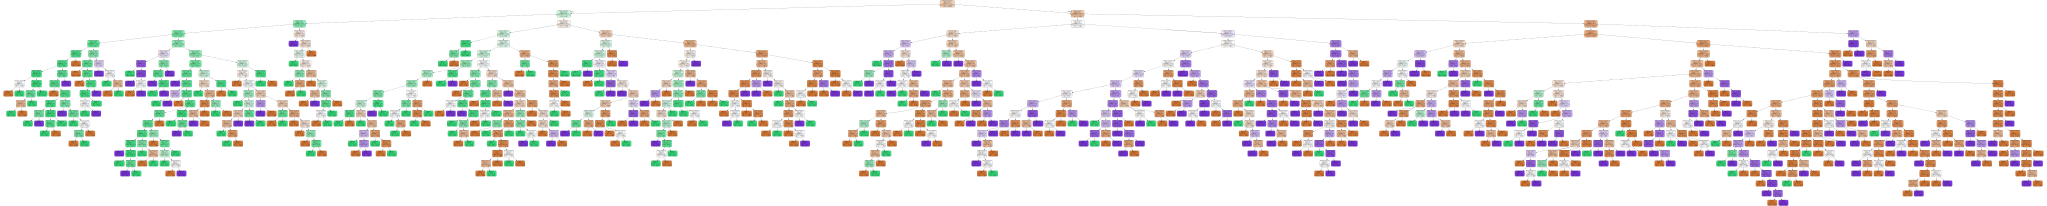

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
        tree_clf,
        out_file=None, 
        feature_names=["PC1", "PC2",'PC3','PC4','PC5'],
        class_names=["yellow", "blue",'red','green','black '],
        rounded=True,
        filled=True
    )
graph = Source(dot_data)  
graph

In [ ]:
graph.savefig(g.png)

svm (rbf) donne des performanc bonne performance

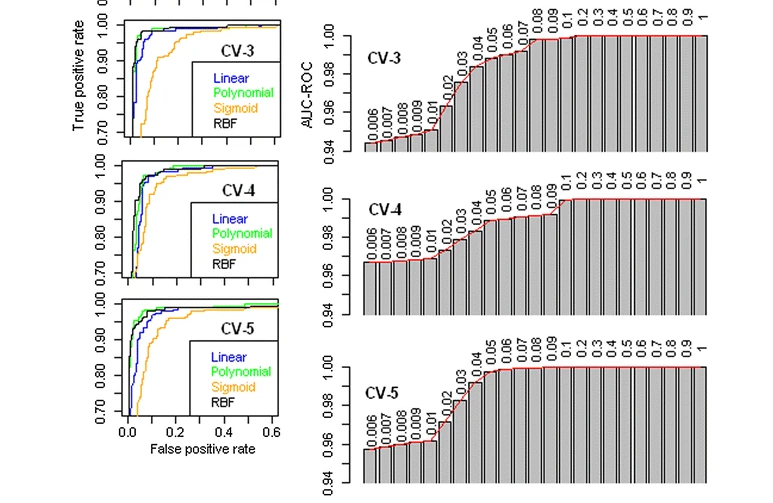

comparaison avec la travail du Prabina Kumar Meher, Tanmaya Kumar Sahu

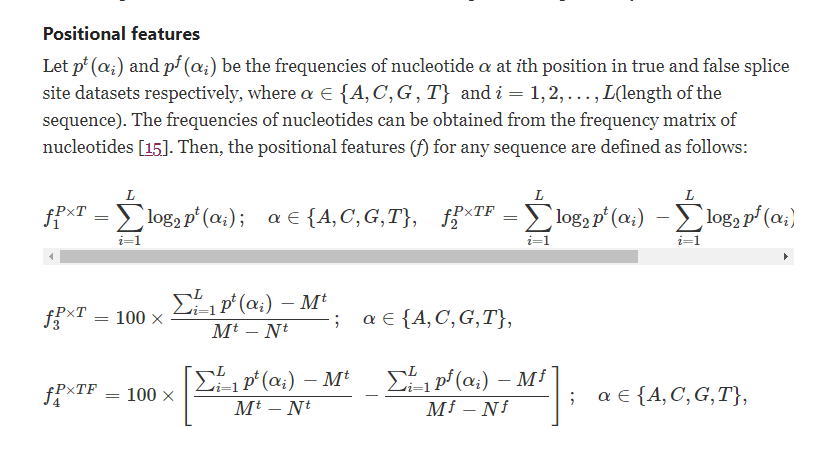

# ***reference***

https://almob.biomedcentral.com/articles/10.1186/s13015-016-0078-4#Abs1
https://www.frontiersin.org/articles/10.3389/fbioe.2020.01032/full
https://logomaker.readthedocs.io/en/latest/